In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X,y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

Note: datasets loadsd by scikit-learn have a dictionary structure. 

- a DESCR structure describing the dataset
- a ```data``` key containing an array with one row per instance and one column per feature
- a ```target``` with an array with the labels

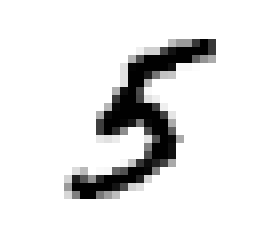

In [6]:
def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
plot_digit(X[36003])

In [7]:
y[36003]

5.0

Train and test set

In [8]:
shuffle_index = np.random.permutation(X.shape[0])
X, y = X[shuffle_index], y[shuffle_index]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train[:100]

array([ 2.,  3.,  0.,  1.,  4.,  1.,  1.,  8.,  3.,  2.,  4.,  9.,  5.,
        7.,  0.,  5.,  2.,  6.,  9.,  2.,  3.,  6.,  3.,  4.,  3.,  8.,
        0.,  4.,  7.,  5.,  1.,  3.,  0.,  8.,  6.,  6.,  8.,  2.,  2.,
        4.,  9.,  4.,  1.,  2.,  1.,  9.,  8.,  5.,  5.,  4.,  2.,  8.,
        0.,  3.,  5.,  9.,  0.,  7.,  3.,  7.,  6.,  1.,  5.,  5.,  4.,
        2.,  1.,  7.,  6.,  2.,  2.,  0.,  3.,  3.,  9.,  9.,  8.,  7.,
        1.,  8.,  7.,  5.,  2.,  1.,  8.,  1.,  8.,  7.,  0.,  5.,  8.,
        1.,  6.,  4.,  2.,  0.,  3.,  3.,  3.,  8.])

## Binary Classifier

Let's consider a problem where we just want to identify a 1 or a 2 (binary classification). So let's create our datasets

In [78]:
X_train1 = X_train[y_train == 1]/255.0
y_train1 = y_train[y_train == 1]
X_train2 = X_train[y_train == 2]/255.0
y_train2 = y_train[y_train == 2]


X_test1 = X_test[y_test == 1]/255.0
y_test1 = y_test[y_test == 1]
X_test2 = X_test[y_test == 2]/255.0
y_test2 = y_test[y_test == 2]

# Reshape


X_train1 = X_train1.transpose()
y_train1 = y_train1.reshape(1,y_train1.shape[0])
X_train2 = X_train2.transpose()
y_train2 = y_train2.reshape(1,y_train2.shape[0])

X_test1 = X_test1.transpose()
y_test1 = y_test1.reshape(1,y_test1.shape[0])
X_test2 = X_test2.transpose()
y_test2 = y_test2.reshape(1,y_test2.shape[0])

#print(X_train1.shape)
#print(X_train2.shape)

# End of reshape

X_train12 = np.concatenate((X_train1, X_train2), axis = 1)
y_train12 = np.concatenate((y_train1, y_train2), axis = 1)

X_test12 = np.concatenate((X_test1, X_test2), axis = 1)
y_test12 = np.concatenate((y_test1, y_test2), axis = 1)

shuffle_index = np.random.permutation(X_train12.shape[1])
X_train12, y_train12 = X_train12[:,shuffle_index], y_train12[:,shuffle_index]

shuffle_index = np.random.permutation(X_test12.shape[1])
X_test12, y_test12 = X_test12[:,shuffle_index], y_test12[:,shuffle_index]

print(X_train12.shape)
print(y_train12.shape)
print(X_test12.shape)
print(y_test12.shape)

dim_train = X_train12.shape[1]
dim_test = X_test12.shape[1]

print(dim_train)
print(dim_test)

(784, 12795)
(1, 12795)
(784, 2072)
(1, 2072)
12795
2072


y_train1  6815
(1, 6815)
y_train2  5980
(1, 5980)
(784, 6815)
(784, 12795)


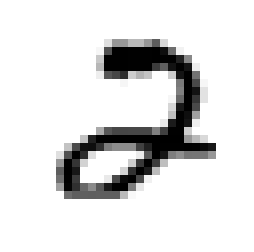

[ 2.]


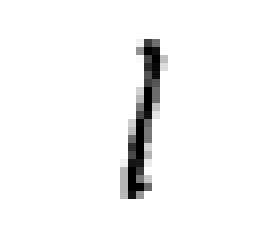

[ 1.]


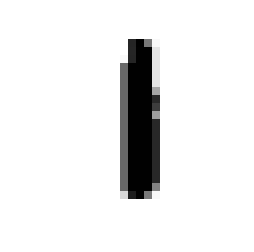

[ 1.]


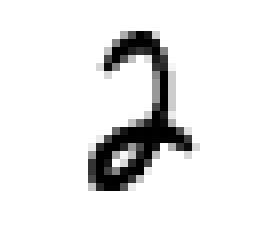

[ 2.]


In [80]:
print(X_train1.shape)
print(X_train12.shape)

plot_digit(X_train12[:,1005])
print(y_train12[:,1005])
plot_digit(X_train12[:,1432])
print(y_train12[:,1432])
plot_digit(X_train12[:,456])
print(y_train12[:,456])
plot_digit(X_train12[:,567])
print(y_train12[:,567])

## Helper functions

In [81]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    
    return s

In [82]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert (w.shape == (dim,1))
    assert (isinstance(b, float) or isinstance(b,int))
    
    return w,b

For our input our $w$ will have dimensions (784,1)

In [59]:
def propagate(w, b, X, Y):
    
    
    m = X.shape[1]
    
    z = np.dot(w.T,X)+b
    
    #print("A big count ",np.count_nonzero(z > 1000))
    A = sigmoid(z)

    
    #print(X.shape, Y.shape, A.shape)

    
    cost = -1.0/m*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))
    
    
    dw = 1.0/m*np.dot(X, (A-Y).T)
    db = 1.0/m*np.sum(A-Y)
    
    
    #print ("z[5] is equal to ", z[:,5])
    #print ("A[5] is equal to ", A[:,5])
    #print ("w is equal to ", w)
    #print ("sum(w) is equal to ", np.sum(w))
    
    #print("dw == 0 ",np.count_nonzero(dw == 0))
    
    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    
    cost = np.squeeze(cost)
    assert (cost.shape == ())
    
    grads = {"dw": dw, 
             "db":db}
    
    return grads, cost

In [60]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        #print(w)
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))
            
    grads = {"dw": dw, "db": db}
    params = {"w": w, "b": b}
        
    return params, grads, costs

In [61]:
def predict (w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid (np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0
            
    assert (Y_prediction.shape == (1,m))
    
    return Y_prediction
        

## Model

In [62]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    
    #print("Dimension for init ", X_train.shape[0])
    w, b = initialize(X_train.shape[0])
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)
    
    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 -np.mean(np.abs(Y_prediction_test-Y_test)*100.0)
    
    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)
    
    return d

In [63]:
print(X_train12.shape)

(784, 12795)


In [64]:
d = model (X_train12, y_train12, X_test12, y_test12, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

number of 1  6815
number of 2  5980
Cost (iteration 0) = 0.693147
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  598

//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 

//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 

number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
Cost (iteration 500) = nan
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
n

number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 

number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 

number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
Cost (iteration 1200) = nan
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815


number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 

number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 

number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 2  5980
number of 1  6815
number of 

In [65]:
d = model (X_test12, y_test12, X_test12, y_test12, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

number of 1  1062
number of 2  1010
Cost (iteration 0) = 0.693147
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  101

//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
Cost (iteration 200) = -inf
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010


number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 

number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 

number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 

number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 

number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 2  1010
number of 1  1062
number of 

KeyboardInterrupt: 